## Capstone Project
Predicting the metascore of a movie base on the given features.
* Sai Kiran Rebba
* June 25th,2018.

## I.Definition:
#### Project Overview:
   * Now a days everyone is watching movies and give rating or review for that whether it is good or bad.With this information I have an idea to predict the score of the particular movie based on the rating given by the audience and voting. 
   * Hence an analysis is made by Preetish panda, which was posted in Linkedin. Source :- https://www.linkedin.com/pulse/analyzing-imdb-movie-dataset-preetish-panda
   * By the sheer exploration of the data it is possible to develop certain score based on the related charactersitics or features which can be used to give information about that movie whether it is good or bad.
   * Hence, in this project I developed a model that can predict the metascore by using rating of a particular movie and votes polled to that movie and revenue i.e howmuch money invested on that movie and genres i.e comedy,drama,horror,adventures,sci_fi,romance etc and actors etc.
    
#### Problem Statement:
   * The goal is to develop a model that can predict the score 'Chance Of Admit', that determines an individuals chances of getting an admission in the university he desires to pursue his/her education.
    
   * The tasks involved are :-
    
   * Download and preprocess the imdb data.
   * Train a BenchMark Model and record it's performance.
   * Then three supervised learning models were trained using the training data and a comparision is done based on the performance metric and decided which among the three is the best model.
   * The best model thus selected is optimized using GridSearchCV technique.
   * The Optimized model is then compared with the Benchmark model and deciding which is the best for the given data.
   * Then the best model is validated aganist unseen data and documenting the intuition.
   * The final model can be applied to determine the metascore of a particular movie with the givrn features. 
    
#### Metric:
   * The current problem is a Regression task, since it takes certain features as inputs and attempts to find a score that helps an individual to get an idea about particular movie.

   * Hence, Coefficient Of Determination is considered as the performance metric that can be applied to compare the performances of the scores obtained from the BenchMark and the Optimal Model considered.

   * The CoEfficient Of Determination(R^2) is the key output of the Regression Analysis.It can be defined as the proportion of the varaince in the dependent variable that is predictable from the independent variable.

   It's values ranges from 0 to 1, and the results are given intuition by, if:-

    The value of R^2 -> 0 , indicates that the model is a worst fit to the given data.
    The value of R^2 -> 1 , indicates that the model is the best fit to the given data.
    The value of R^2 in between 0 and 1 -> indicates that the respective variability exhibited by the target variable.
    The formula for CoEfficient Of Determination(R^2) is given by :- fed29779d54adeccdec58f0894870c680f3d6b5b.svg

    From the above formula SSreg is called Sum of Squares of Residuals, also called the Residual Sum of Squares: Source :-https://en.wikipedia.org/wiki/Residual_sum_of_squares

    And the SStot is called the Total Number of Squares. Source :-https://en.wikipedia.org/wiki/Total_sum_of_squares

## Loading the required data -> Data Acquisition:
* Data acquisition is the initial step in machine learning.Here the data is acquired from kaggle.com.
* Link to the dataset:  https://www.kaggle.com/nielspace/fork-of-imdb-data-set/data

In [2]:
#importing the necessary libraries for the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display #facilitates the use of display() for Data frames

#loading the data set
data=pd.read_csv('IMDB-Movie-Data.csv')
print("IMDB dataset has {} data points and {} variables each.".format(*data.shape))

IMDB dataset has 1000 data points and 12 variables each.


In [3]:
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtimeinminutes,Rating,Votes,RevenueinMillions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
data.describe()

,Rank,Year,Runtimeinminutes,Rating,Votes,RevenueinMillions,Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


## Data Preprocessing:
 * Data preprocessing means remove the unnnecessary data fro our dataset.
 * Cleaning the data like the rows which are empty are being removed from the datasset,if have been persist in the dataset then they abnormal results.

In [5]:
d=data.dropna()

* We can observe that the features, 'give us with the quantitative information about each data point.

* The target varaible, 'Chance of Admit', will be the variable we intend to predict. These are stored in the varaibles features and scores respectively

In [6]:
d.describe()

,Rank,Year,Runtimeinminutes,Rating,Votes,RevenueinMillions,Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


  * Here I think movie title ,Description and its rank are not play a key role in our prediction .So, I remove those features from  out data. 

In [7]:
d=d.drop(['Title','Description','Rank'],axis=1)

## Data Exploration:

   * Data Exploration is a crucial step in the process of Machine Learning.It helps us to understand the patterns and available features in a data set from which we can determine the sort of actions that we can perform for further analysis.

   * Data Exploration gives an intuition that a cursory investigation of the data-set is necessary for familiarizing ourself with the data through an explorative process and is a fundamental practice to help you better understand and justify your results.

   * Since, the main goal of this project is construct a working model that has the capability of predicting the 'Metascore', we will need to separate the dataset into features and the target variable.

In [8]:
metascore=d['Metascore']
features=d.drop('Metascore',axis=1)
features.head()

,Genre,Director,Actors,Year,Runtimeinminutes,Rating,Votes,RevenueinMillions
0,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13
1,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46
2,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12
3,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32
4,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02


#### Feature set Exploration:
   * Genre -> It tells us about the type of the movie.for example Action,Adventure,Horror,Thriller,Fantasy,Sci_fi etc.
   * Director -> Director of that movie.
   * Actors -> Actors which are acted in that movie.
   * Year -> In which year the movie was released.
   * Runtimeinminutes -> Duration of the movie in minutes like 120 minutes,180 minutes etc.
   * Rating -> Rating of that movie ranges from 0 to 10 in float values.
   * Votes -> Number of votes polled for that movies.
   * Revenueinmillions -> Budget of that movie in million.


#### Calculating the necessary statistics needed :

 * For the initial coding implementation, calculating descriptive statistics about the Chance of Admit Scores is important.These statistics will be extremely important later on to analyze various prediction results from the constructed model.


In [9]:
n_records=len(metascore)
print "number of records:",n_records
#minimum value in metascore
min_score=np.min(metascore)
print "Min value:",min_score

#max value in metascore
max_score=np.max(metascore)
print "Max_value:",max_score

#mean of metascore
mean_score=np.mean(metascore)
print "Mean_score:",mean_score
""
#standard deviation of metascore
std_score=np.std(metascore)
print "Standard deviation:",std_score

number of records: 838
Min value: 11.0
Max_value: 100.0
Mean_score: 59.5751789976
Standard deviation: 16.942298668


#### Exploratory Visualisation:
 * Exploratory Visualization can be defined as an approach for analyzing data sets to summarize their important characteristics, often by the application of visual methods.

 * The Primary theme of Exploratory Visualization is for observing what the data can give us an intuition far beyond the conventional modeling or hypothesis testing tasks.

In [10]:
movie_yearly_count = d['Year'].value_counts().sort_index(ascending=False)

Movies count in particular year:


Text(0,0.5,u'Count')

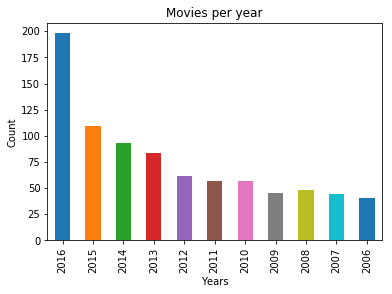

In [13]:
print "Movies count in particular year:"
plt.title("Movies per year")
movie_yearly_count.plot(kind='bar')
plt.xlabel("Years")
plt.ylabel("Count")

Text(0.5,0,u'Rating')

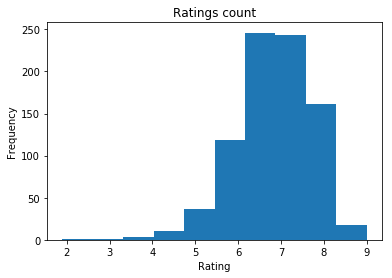

In [14]:
plt.title("Ratings count")
d['Rating'].plot(kind='hist')
plt.xlabel("Rating")

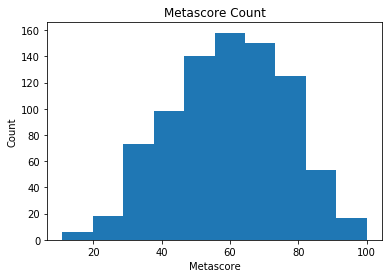

In [17]:
plt.title("Metascore Count")
plt.hist(metascore)
plt.xlabel("Metascore")
plt.ylabel("Count")
plt.show()

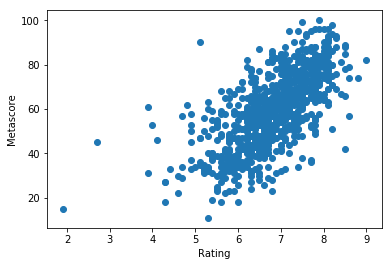

In [20]:
plt.xlabel("Rating")
plt.ylabel("Metascore")
plt.scatter(features['Rating'],metascore)
plt.show()

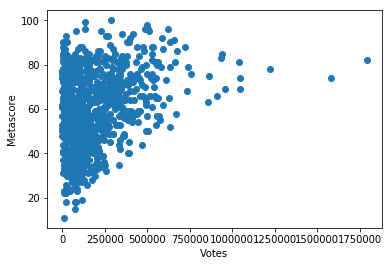

In [21]:
plt.xlabel("Votes")
plt.ylabel("Metascore")
plt.scatter(features['Votes'],metascore)
plt.show()

Action,Adventure,Sci-Fi       50
Comedy,Drama,Romance          30
Drama                         29
Drama,Romance                 27
Comedy                        26
Animation,Adventure,Comedy    26
Action,Adventure,Fantasy      25
Comedy,Drama                  24
Comedy,Romance                22
Crime,Drama,Thriller          18
Crime,Drama,Mystery           18
Action,Adventure,Drama        17
Action,Crime,Drama            16
Adventure,Family,Fantasy      14
Action,Adventure,Comedy       14
Biography,Drama,History       12
Drama,Thriller                12
Action,Comedy,Crime           12
Biography,Drama               11
Action,Adventure,Thriller     11
Action,Crime,Thriller         11
Horror,Thriller               11
Animation,Action,Adventure     8
Crime,Drama                    8
Biography,Crime,Drama          8
Adventure,Comedy,Drama         8
Action,Thriller                8
Biography,Drama,Sport          7
Horror,Mystery,Thriller        7
Horror                         7
          

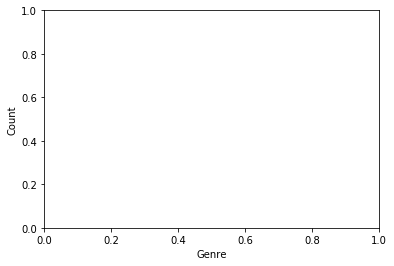

In [22]:
print(features['Genre'].value_counts())

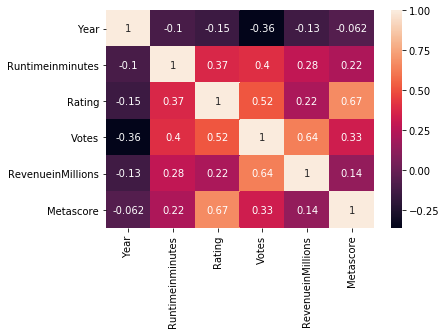

In [24]:
sns.heatmap(d.corr(),annot=True)

## ALGORITHMS AND TECHNIQUES
By observing the problem, it is quite evident that it is a 'Regression' Problem.

It is important to understand the intuition behind the consideration of specific model, since it has to generate an optimal possibility of results that can improve the model's performance on a sample of new data.

Hence, taking the performance of the model into consideration, I chose three Supervised Machine Learning Algorithms that can be better compatible for the data being available.

They are :-

Ensemble Methods - i) Random Forests, ii)GradientBoostingRegressor
iii)Lasso

#### Ensemble Methods - Random Forests :-

Random forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes in case of the classification tasks or mean prediction for the regression tasks of the individual trees.

The Random forests have a stroke of brilliance when a performance optimization happens to enhance precision of the model, or vice versa.Tuning down the fraction of features that is considered at any given node can let you easily work on datasets with thousands of features.

Since Random Forests perform well on almost every machine learning problem and they also show less overfit behavior when compared to Decision Trees.

#### GradientBoosstingRegressor:
Gradient Boosting Regresor is a ensemble algorithm for both classification and regression.GBTs build trees one at a time, where each new tree helps to correct errors made by previously trained tree. With each tree added, the model becomes even more expressive. There are typically three parameters - number of trees, depth of trees and learning rate, and the each tree built is generally shallow. 

  Although it may seem GBDTs are better than random forests, GBDTs are prone to overfitting, however there are strategies to overcome same and build more generalized trees using a combination of parameters like learning rate (shrinkage) and depth of tree.  Generally the two parameters are kept on the lower side to allow for slow learning and better generalization. 



#### Lasso:
It is one of the regresion technique.It uses regularisation.LASSO stands for Least Absolute Shrinkage and Selection Operator. I know it doesn’t give much of an idea but there are 2 key words here – ‘absolute‘ and ‘selection‘.
https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/#four

## Data Preprocessing:

#### Feature Tranformation :-

 * Feature transformation is an important concept in the Data Preprocessing phase which involves the tranformation of relevent numerical data into the range of 0 to 1 by using min_max_scaler which is available in sklearn.preprocessing.

 * We also need to transform the categorial data into numerical data by using get_dummies().

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#nummerical=['Rank','Year','Rutime(Minutes)','Rating','Votes']
df=pd.DataFrame(features)
print df
df[['Year','Runtimeinminutes','Rating','Votes','RevenueinMillions']] = scaler.fit_transform(df[['Year','Runtimeinminutes','Rating','Votes','RevenueinMillions']])
df

                          Genre              Director  \
0       Action,Adventure,Sci-Fi            James Gunn   
1      Adventure,Mystery,Sci-Fi          Ridley Scott   
2               Horror,Thriller    M. Night Shyamalan   
3       Animation,Comedy,Family  Christophe Lourdelet   
4      Action,Adventure,Fantasy            David Ayer   
5      Action,Adventure,Fantasy           Yimou Zhang   
6            Comedy,Drama,Music       Damien Chazelle   
8    Action,Adventure,Biography            James Gray   
9       Adventure,Drama,Romance         Morten Tyldum   
10     Adventure,Family,Fantasy           David Yates   
11      Biography,Drama,History        Theodore Melfi   
12      Action,Adventure,Sci-Fi        Gareth Edwards   
13   Animation,Adventure,Comedy          Ron Clements   
14          Action,Comedy,Drama       Nacho Vigalondo   
15   Animation,Adventure,Comedy          Chris Renaud   
16      Biography,Drama,History            Mel Gibson   
17              Action,Thriller

,Genre,Director,Actors,Year,Runtimeinminutes,Rating,Votes,RevenueinMillions
0,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",0.8,0.454545,0.873239,0.422437,0.355669
1,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",0.6,0.479339,0.718310,0.271045,0.135016
2,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",1.0,0.421488,0.760563,0.087863,0.147465
3,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",1.0,0.347107,0.746479,0.033692,0.288609
4,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",1.0,0.471074,0.605634,0.219647,0.347010
5,"Action,Adventure,Fantasy",Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",1.0,0.305785,0.591549,0.031175,0.048183
6,"Comedy,Drama,Music",Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",1.0,0.512397,0.901408,0.144276,0.161280
8,"Action,Adventure,Biography",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",1.0,0.619835,0.732394,0.003912,0.008552
9,"Adventure,Drama,Romance",Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",1.0,0.413223,0.718310,0.107158,0.106776
10,"Adventure,Family,Fantasy",David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",1.0,0.553719,0.788732,0.129424,0.249853


In [26]:
#hot code encoding
df=pd.get_dummies(df)
print df.head(1)

   Year  Runtimeinminutes    Rating     Votes  RevenueinMillions  \
0   0.8          0.454545  0.873239  0.422437           0.355669   

   Genre_Action  Genre_Action,Adventure  Genre_Action,Adventure,Biography  \
0             0                       0                                 0   

   Genre_Action,Adventure,Comedy  Genre_Action,Adventure,Crime  \
0                              0                             0   

                                         ...                                         \
0                                        ...                                          

   Actors_Zac Efron, Wes Bentley, Emily Ratajkowski, Jonny Weston  \
0                                                  0                

   Actors_Zach Galifianakis, Bradley Cooper, Justin Bartha, Ed Helms  \
0                                                  0                   

   Actors_Zach Galifianakis, Isla Fisher, Jon Hamm, Gal Gadot  \
0                                                  

#### Grid Search CV:-

Grid Search technique is an approach for tuning the parameters that are used to build and evaluate a model based on the individual combination of parameters of an algorithm specified in a grid.

Grid Search rigorously checks for the combination of hyper-parameters in order to find the best model.

Finally it's easy to figure out the combination that has high cross validation accuracy with respect to the parameters considered that eventually contribute to the optimization of the learning algorithm

By the next approach, I will chose the best of these of three models, that can be an optimized model for the data set.

I will then use the performance metric (r2_score) and compare the three potential based on their scores, the model which has the best r2_score will be eventually considered for further analysis.

Eventually I'll optimize the selected model by 'GridSearchCV' and evaluate the model by comparing the final r2_score of the optimized model and the benchmark model.



In [27]:
df

,Year,Runtimeinminutes,Rating,Votes,RevenueinMillions,Genre_Action,"Genre_Action,Adventure","Genre_Action,Adventure,Biography","Genre_Action,Adventure,Comedy","Genre_Action,Adventure,Crime",...,"Actors_Zac Efron, Wes Bentley, Emily Ratajkowski, Jonny Weston","Actors_Zach Galifianakis, Bradley Cooper, Justin Bartha, Ed Helms","Actors_Zach Galifianakis, Isla Fisher, Jon Hamm, Gal Gadot","Actors_Zach Galifianakis, Kristen Wiig, Owen Wilson, Ross Kimball","Actors_Zachary Gordon, Devon Bostick, Robert Capron,Rachael Harris","Actors_Zachary Gordon, Robert Capron, Devon Bostick,Steve Zahn","Actors_Zachary Gordon, Robert Capron, Rachael Harris,Steve Zahn","Actors_Zoey Deutch, James Franco, Tangie Ambrose,Cedric the Entertainer","Actors_Zoey Deutch, Lucy Fry, Danila Kozlovsky, Gabriel Byrne","Actors_Zooey Deschanel, Joseph Gordon-Levitt, Geoffrey Arend, Chloë Grace Moretz"
0,0.8,0.454545,0.873239,0.422437,0.355669,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.6,0.479339,0.718310,0.271045,0.135016,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.421488,0.760563,0.087863,0.147465,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.347107,0.746479,0.033692,0.288609,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.471074,0.605634,0.219647,0.347010,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1.0,0.305785,0.591549,0.031175,0.048183,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1.0,0.512397,0.901408,0.144276,0.161280,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.0,0.619835,0.732394,0.003912,0.008552,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1.0,0.413223,0.718310,0.107158,0.106776,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1.0,0.553719,0.788732,0.129424,0.249853,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Implementation of Coefficient of Determination:

In [28]:
from sklearn.metrics import r2_score
def performance_metric(y_true,y_pred):
    #calculate r2_score for y_true and y_pred
    score=r2_score(y_true,y_pred)
    #return the score
    return score

## Shufffling and plitting the data

In [29]:
from sklearn.model_selection import train_test_split
#splitting the data into training and testing sets.
X_train,X_test,y_train,y_test=train_test_split(df,metascore,test_size=0.25,random_state=24)
#successfully splitted
print "Data ssuccesfully splitted into training and testing sets..."

Data ssuccesfully splitted into training and testing sets...


## BENCHMARK MODEL

#### DEFINITION :-

A Bench Mark Model can be defined as a standard model that already shows a better performance on a given data.The factors on which our results or the solution is tested, are mostly going to be the amount of training/testing data, and then we compare your solution with that of the benchmarked solution obviously based on a performance metric(here r2_score).

The main theme here is to understand which model works delivers the best solution than their existing solution.So, it can be achieved by sheer analysis, implementing standard algorithms and observance and coming to the conclusion that the model shows good solutions or results than the benchmark model's solution.

Since, the problem is a 'Regression' task , I'm implementing a 'Linear Regression' model as my BenchMark Model.

In [30]:
# importing Linear Regression model library from sklearn
from sklearn.linear_model import LinearRegression

#create a linear regressor object
reg=LinearRegression()

#Fitting the model using the training sets
reg.fit(X_train,y_train)

#making the predictions using the testing sets
y_pred=reg.predict(X_test)

In [31]:
# Calculating the performance of the model 
score  = performance_metric(y_test,y_pred)
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.597.


#### Explanation :-

It is evident that the Linear Regression Model (BenchMark Model) shows a striking performance of 0.757 which means that the target variable('Chance Of Admit') caputerd 75.7% of variance.

#### IMPLEMENTATION
In the further section of the project, I'll intuitively select the best out of the three models that I considered for the current problem by using the performance metric(r2_score), based on the results generated, I'll decide best of the three models, which is optimal for the given problem.

INITIAL MODEL EVALUATION :-
In this section, I'll clearly show the coding implementation of the three supervised learning models

Import the necessary libraries and intialize the models and store them in respective variables.
And finally comparing the r2_scores of the three learning models and decide which one is the best.


## 1. Random Forest Regressor

In [32]:
# importing RandomForestRegressor model library from sklearn
from sklearn.ensemble import RandomForestRegressor

#create a linear regressor object
reg= RandomForestRegressor(random_state=24)

#Fitting the model using the training sets
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
for_score=performance_metric(y_test,y_pred)
print("Model has a coefficient of determination, R^2, of {:.2f}.".format(for_score))

Model has a coefficient of determination, R^2, of 0.53.


## 2. Lasso

In [33]:
# importing Lasso model library from sklearn
from sklearn.linear_model import Lasso

#create a Lassso object
reg=Lasso(alpha=0.1)

#Fitting the model using the training sets
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

lasso_score=performance_metric(y_test,y_pred)
print("Model has a coefficient of determination, R^2, of {:.2f}.".format(lasso_score))

Model has a coefficient of determination, R^2, of 0.54.


## 3. Gradient Boosting Regressor:

In [34]:
# importing GradientBootingRegressor model library from sklearn
from sklearn import ensemble

#params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          #'learning_rate': 0.01, 'loss': 'ls'}
#create a GradientBootingRegresso object
reg = ensemble.GradientBoostingRegressor(random_state=24)

#Fitting the model using the training sets
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
grad_score=performance_metric(y_test,y_pred)
print("Model has a coefficient of determination, R^2, of {:.2f}.".format(grad_score))

Model has a coefficient of determination, R^2, of 0.59.


#### CHOOSING THE BEST MODEL:

Since, it is obvious that the model which has best high r2_score when compared to the other models can be termed as the best optimal model for the current problem, as the fact that if :-

r2_score is 0 -> it indicates that the model is a worst fit to the given data.
r2_score is 1 -> it indicates that the model is the best fit to the given data.
r2_score in between 0 and 1 -> indicates that the respective variability exhibited by the target varaible.
The values can be tabulated as follows :-

#### Results:
      Metric	 |  RandomForest Regressor Model	| Lassso Model	|  Gradient Boosting Regressor Model |
      r2 score   |	            0.53	            |       0.54	|               0.59                 |

## Chossing the best Model

The major analysis that can be obtained from the above tabulated data is that the 'Gradient Boosting Regressor Model' is the best model among the three, since it exhibits a high score of 0.59i.e, the target variable accounted for about 59% of the variance.

And Random Forest Regressor shows a score of '0.53' which indicates that 53% is accounted for the target variable..

Lasso shows a decent score of '0.54' which indicates that 54% is accounted for the target variable.

#### REFINEMENT
In this section of the project, the model('Gradient Boosting Regressor Model') is optimized by the application of 'GridSearchCV' technique for fine tuning the parameters for the final model thus choosen and later calculating the performance metric(r2_score) of the optimized model.

#### MODEL TUNING
Here, I will find the implementaion of GridSearchCV by intially importing the libraries sklearn.grid_search.GridSearchCV and sklearn.metrics.make_scorer.

1. Initialize the regressor('Gradient Boosting Regressor Model') and store it in the varaible 'reg'.

2. Creating a dictionary of parameters, in the variable parameters.

3. Using make_scorer to create a r2_score scoring object. -> score

4. Perform Grid Search on the Regressor lgr_grid using the 'scorer', and store it in grid_obj.

5. Fit the Grid Search Object to the training data (X_train, y_train) and store it in the grid_fit.

In [39]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.grid_search import GridSearchCV
param_grid={'n_estimators':[100,500,1000], 
            'learning_rate': [0.1, 0.05, 0.02], 
            'max_depth':[3,4,5],
            'random_state':[24]
           }
n_jobs=4
reg1=ensemble.GradientBoostingRegressor()
cv_sets = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size = 0.20, random_state = 24)
reg1 = GridSearchCV(estimator=reg1,param_grid=param_grid, cv=cv_sets)
reg1_fit = reg1.fit(X_train,y_train)
#print "r2 / variance : ", reg1.best_score_



# Make predictions using the unoptimized and model
y_pred = reg1_fit.predict(X_test)

#y_best_pred = best_clf.predict(X_test)
scote=performance_metric(y_test,y_pred)

print("Model has a coefficient of determination, R^2, of {:.2f}.".format(score))

print "Best Estimator learned through GridSearch"
print reg1.best_estimator_ 

Model has a coefficient of determination, R^2, of 0.60.
Best Estimator learned through GridSearch
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=24,
             subsample=1.0, verbose=0, warm_start=False)


#### Observation :-

It is quite obvious that the 'Gradient Boosting Regressor' Model showed a best improvement upon Model Tuning using the GridSearchCV technique.

We can observe the trend of the improvement by the values tabulated as follows :-

    Metric	  |  Gradient Boosting  Regressor(Before Tuning)	| Gradient Boosting Regressor Model(After Tuning)
    r2 score  | 	           0.59	                            |                     0.60
It is quite evident from the table that the GradientBoosting  Regressor showed asome what good improvement upon optimization by the target variable accounting for about 60% of the variance.

## FINAL MODEL EVALUATION

In this part of the project I'll demonstrate the comparison of the performances between the BenchMark Model('Linear Regressor') and the Opmital Model('Gradient Boosting  Regressor') based on their performance metrics(r2_score) in a tabular form.

#### Results
    Metric	   |   Linear Regressor Model(BenchMark Model)	|  Gradient Boosting Regressor Model(Optimal Model)
    r2 score   |              0.597                         |             0.60

#### Observation :-
Although the performances of the BenchMark Model and the Optimal Model thus considered are quite figurative and are literally showing nearly similar performances, it is quite evident that the Gradient Boosting Regressor Model(Optimal Model) shows good  performance than the Linear Regressor Model(BenchMark Model).

And it is quite obvious that Gradient Boosting  Regressor Model i.e., Optimal Model shows a better performance on the input dataset.

## MODEL VALIDATION

In this part of the project, I'll demonstrate the performance of the Best Model for the given regression task i.e., The Optimal Model aganist unseen data.

Task - Predicting The Metascore of a given movie

Reckon that the data of the three students are as follows :-

In [73]:
for i in range(0,4):
    print X_test[0:i]
x=X_test[0:3]
y=y_test[0:3]

for i, score in enumerate(reg1_fit.predict(x)):
    print("Predicted cmetascore for movie {}'s: {:,.2f}".format(i+1, score))


Empty DataFrame
Columns: [Year, Runtimeinminutes, Rating, Votes, RevenueinMillions, Genre_Action, Genre_Action,Adventure, Genre_Action,Adventure,Biography, Genre_Action,Adventure,Comedy, Genre_Action,Adventure,Crime, Genre_Action,Adventure,Drama, Genre_Action,Adventure,Family, Genre_Action,Adventure,Fantasy, Genre_Action,Adventure,Horror, Genre_Action,Adventure,Mystery, Genre_Action,Adventure,Romance, Genre_Action,Adventure,Sci-Fi, Genre_Action,Adventure,Thriller, Genre_Action,Adventure,Western, Genre_Action,Biography,Drama, Genre_Action,Comedy, Genre_Action,Comedy,Crime, Genre_Action,Comedy,Drama, Genre_Action,Comedy,Family, Genre_Action,Comedy,Fantasy, Genre_Action,Comedy,Horror, Genre_Action,Comedy,Mystery, Genre_Action,Comedy,Romance, Genre_Action,Comedy,Sci-Fi, Genre_Action,Comedy,Sport, Genre_Action,Crime,Drama, Genre_Action,Crime,Fantasy, Genre_Action,Crime,Mystery, Genre_Action,Crime,Sci-Fi, Genre_Action,Crime,Sport, Genre_Action,Crime,Thriller, Genre_Action,Drama,Family, Genre

## Justification:
Here I take the unseen data from test set because they are also unseen by the user.Initially we divide the dataset into train and test sets.So,I think this is fine.
By observing the results above we come to conclusion that:

Finals results are approximately equal to the actual reulsts.But it mainly depends on the rating,votes,Revenueinmillions.Already we visualised the heatmap which shows us the correlation between metascore and these features.

i)Metascore is 56.77.Here runtime is 0.504 and rating is 0.67 but votes ate 0.05 which is very low.So,the metascore is also low.

ii)Metascore is 41.29.Here runtime is 0.355 and rating is 0.577.So it is giving the low value.

iii)Metascore is 79.69.Here rating is 0.9 which is nearly equal to 1 and votes also nearly half of the max value i.re 0.4 .So,it is giving the highest value.

## Free Form Visualisation:
   * The most important feature for this dataset is 'Rating'.So,I plot a scatterplot between RRating and Metascore.
   * The correlation between rating and etascore in 0.67.
   * If the Rating increases then Metascore also increases.So,it plays a key role in this dataset.


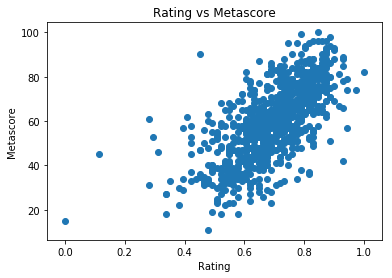

In [41]:
plt.title("Rating vs Metascore")
plt.xlabel("Rating")
plt.ylabel("Metascore")
plt.scatter(features['Rating'],metascore)
plt.show()

## Reflection:
  * The process used for this project can be summarized using the following steps:-

   * A Common Problem on Graduate Admissions is found in "Kaggle" and the data set related to it is acquired from the Public Domain.
   * The Dataset was downloaded and loaded for the current project and necessary statistics were calculated.
   * The Data Set is Explored with scatter-plots to illustrate the correlation of the input features with respect to the target variable.
   * The Data Set is preprocessed using the technique "Feature Selection" and irrelevant attributes are removed from the dataset.
   * Feature transfromation is vary important for this project.In this project first of all we have to convert the categorial data into numerical data by using get_dummies.
   * A function is designed that calculates the performance metric r2_score and returns that score.
   * The data is splitted into 75% training and 25% testing data.
   * A BenchMark was created for the Regressor i.e, here Linear Regressor acts as a BenchMark Model and is trained using the training data.
   * Then three supervised learning models were trained using the training data and a comparision is done based on the performance metric and decided which among the three is the best model.
   * The best model thus selected is optimized by the application of 'GridSearchCV'.
   * The optimized model is then compared with the BenchMark Model and came to the conclusion that the Optimzed Model shows a better performance than the BenchMark model.
   * Finally the Optimized Model which is selected as the best model for the input data is validated aganist unseen data and the performance and intuition was documented clearly.
  I personally found that the features which are important for the data is very difficult.Because it's giving low r2_score values when we run with some important features.Again if we run with some other important then it  increased.

  But finally it is giving low r2_score value which i think that it is suitable for this dataset.

## IMPROVEMENT
   * Potentially the 'Data Preprocessing' phase is the crucial part of any Machine Learning Problem, Since during this phase we can potentially identify the flaws in the data set that could actually mess the results and performance of the model thus considered.

   * Hence, removing irrelevant data during this phase can predominantly increase the model's performance and can benefit in generalized results.
   * Since, this is a regression task, the Wrapper Method implementation i.e., RFE may not be the best one.
   * There is also room for trying Embedded method such as LASSO and Elastic Net and Ridge Regression that don't need the external implementation of the feature selection techniques , since these methods have embedded feature selection and regularization built in. It's worth a trial, since there is always scope for improving the model performance aganist the given dataset.
   * Further more, some ensemble methods such as 'XGBOOST' should also take care of larger data dimensions and these methods can themselves be used for feature selection.